In [279]:
# Q1 Loading the dataset

import numpy as np
import math
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
diabetes = load_diabetes()
diabetes.data.shape

(442, 10)

In [286]:
# Q2 Splitting the dataset

X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(diabetes['data'],
                                                                                        diabetes['target'],
                                                                                        random_state=1103)


In [287]:
# Q3 Finding train and test R^2, and listing the features in the dataset

from sklearn.linear_model import Lasso
lassofit = Lasso().fit(X_train_diabetes, y_train_diabetes)

# Below is Train R^2

lassofit.score(X_train_diabetes, y_train_diabetes)

0.3334306024080044

In [288]:
# Below is Test R^2

test = lassofit.score(X_test_diabetes, y_test_diabetes)
test

0.3874468825968844

In [289]:
# There are 10 features, of the following names: age, sex, bm1, bp, s1, s2, s3, s4, s5, s6

diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [290]:

# Q4 , this is for the original diabetes.data provided in assingment.

original_data = np.genfromtxt('diabetes.data', skip_header = 1, usecols = range(10))
original_data
original_data.shape

(442, 10)

In [291]:
original_label = np.genfromtxt('diabetes.data', skip_header = 1, usecols = 10)

In [292]:

# Q5    Using above data and labels to train test split

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(original_data,
                                                                                        original_label, 
                                                                                        random_state = 1103)

In [293]:

# Q6   Fitting data then first calculating train R^2 then test R^2

lassofit_original = Lasso().fit(X_train_original, y_train_original)

# score for training data

lassofit_original.score(X_train_original, y_train_original)

0.4897740799209189

In [294]:
# score for test data

lassofit_original.score(X_test_original, y_test_original)

0.5679088670072376

In [ ]:
# Using lasso R^2 with the dataset that has been normalised we can see that we have a 
# smaller variance than using the unnormalised.

In [76]:

# Q7    Now to use StandardScaler to preprocess data.


In [295]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()


In [296]:
standard_scaler.fit(X_train_original)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [297]:
X_train_pp = standard_scaler.transform(X_train_original)
X_test_pp = standard_scaler.transform(X_test_original)

In [ ]:

# Q8     Computing Lasso again like before


In [298]:
lassofit_pp = Lasso().fit(X_train_pp, y_train_original)

In [ ]:

# Now computing scores


In [299]:
# score for training data

lassofit_pp.score(X_train_pp, y_train_original)

0.4901026094749654

In [300]:
# score for test data

lassofit_pp.score(X_test_pp, y_test_original)

0.5724612092007035

In [23]:

# Q9-10


[2]


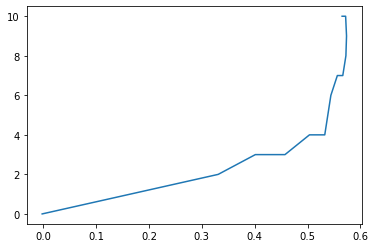

In [301]:
alphas = np.array([0.01, 0.1, 0.25, 0.5, 1, 2, 3, 4, 5, 10, 15, 20, 25, 50])
r_scores = []
handled = []
for i in range(alphas.size):
    lasso = Lasso(alpha = alphas[i], max_iter = 10000).fit(X_train_pp, y_train_original)
    r_scores.append(lasso.score(X_test_pp, y_test_original))
    handled.append(np.sum(lasso.coef_ != 0))

plt.plot(r_scores, handled)

In [302]:
from sklearn.model_selection import GridSearchCV

# Now using cross validation instead
#

grid = {'alpha': [0.01 ,0.1, 0.25, 0.5, 1, 2, 3, 4, 5, 10, 15, 20, 25, 50]}

grid_search = GridSearchCV(Lasso(), grid, cv = 5)

grid_search.fit(X_train_pp, y_train_original)



GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 0.25, 0.5, 1, 2, 3, 4, 5, 10, 15,
                                   20, 25, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [303]:
grid_search.score(X_train_pp, y_train_original)

0.4968745686001653

In [304]:
grid_search.score(X_test_pp, y_test_original)

0.5692942114825577

In [305]:

# Number of features

print(np.sum(grid_search.best_estimator_.coef_ != 0))

10


In [317]:

# Q11 

X_train_proper, X_calib, y_train_proper, y_calib = train_test_split(X_train_original,
                                                                    y_train_original,
                                                                    test_size = 99, 
                                                                    random_state = 1103)

standard_scaler.fit(X_train_proper)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [318]:
X_train = standard_scaler.transform(X_train_proper)
X_calib = standard_scaler.transform(X_calib)
X_test = standard_scaler.transform(X_test_original)

In [ ]:
# Below just making sure/checking paramaters are the same as above.


In [319]:
grid

{'alpha': [0.01, 0.1, 0.25, 0.5, 1, 2, 3, 4, 5, 10, 15, 20, 25, 50]}

In [320]:
grid_search

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 0.25, 0.5, 1, 2, 3, 4, 5, 10, 15,
                                   20, 25, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [321]:
grid_search.fit(X_train_proper, y_train_proper)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 0.25, 0.5, 1, 2, 3, 4, 5, 10, 15,
                                   20, 25, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [322]:
y_c_pred = grid_search.predict(X_calib)

In [323]:
y_calib.size

def absolute_val(z):
    return ((z ** 2) ** 0.5)

non_conformity_scores = []
for i in range(y_calib.size):
    x = (y_calib[i] - y_c_pred[i])
    non_conformity_scores.append(absolute_val(x))


In [ ]:

# Now we have non conformity scores absolute values so it is time to compute 5, 20 %
# significance levels


In [324]:
size = len(non_conformity_scores)
ncs_sorted = np.sort(non_conformity_scores)

fifth_percentile = size - round(size*0.05)
print(fifth_percentile)

twentieth_percentile = size - round(size*0.20)
print(twentieth_percentile)

94
79


In [325]:
size = 99



test_length_5 = ncs_sorted[fifth_percentile]
print(test_length_5)
test_length_20 = ncs_sorted[twentieth_percentile]
print(test_length_20)

634.9092962719985
568.7318884638619


In [326]:

number_errors_5 = 0  
number_errors_20 = 0  


y_test_pred = grid_search.predict(X_test)
y_tp_size = y_test_pred.size

for j in range(y_test_original.size):
  
    

    abso_vals = []
    for i in range(y_tp_size):
        diff = (y_test_original[i] - y_test_pred[i])
        abso = absolute_val(diff)
        abso_vals.append(abso)
        
    
    
    if (abso_vals[j] > test_length_5):
        number_errors_5 = number_errors_5 + 1
        
    elif (abso_vals[j] > test_length_20):
        number_errors_20 = number_errors_20 + 1
    
    
    
print("Test error rate for 5% confidence is", number_errors_5 / y_test_original.size)
print("Test error rate for 20% confidence is ", number_errors_20 / y_test_original.size)

Test error rate for 5% confidence is 0.036036036036036036
Test error rate for 20% confidence is  0.12612612612612611
